In [1]:
pip install h2o

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from C:\Users\Simone\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Simone\AppData\Local\Temp\tmpcwqhkw14
  JVM stdout: C:\Users\Simone\AppData\Local\Temp\tmpcwqhkw14\h2o_Simone_started_from_python.out
  JVM stderr: C:\Users\Simone\AppData\Local\Temp\tmpcwqhkw14\h2o_Simone_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.5
H2O_cluster_version_age:,14 days and 3 minutes
H2O_cluster_name:,H2O_from_python_Simone_4fnbv2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.643 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


# Ci mette circa 3 ore

In [99]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=predictors, y=target, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows) 

AutoML progress: |
11:49:31.430: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200627_114931,0.938873,0.310238,0.961963,0.136862,0.306827,0.094143
StackedEnsemble_BestOfFamily_AutoML_20200627_114931,0.938781,0.310593,0.961974,0.137434,0.306898,0.0941866
DRF_1_AutoML_20200627_114931,0.938446,0.34716,0.961577,0.135952,0.305512,0.0933376
GBM_grid__1_AutoML_20200627_114931_model_4,0.937948,0.30554,0.96172,0.137987,0.306554,0.0939752
GBM_3_AutoML_20200627_114931,0.937893,0.305969,0.962133,0.138767,0.306747,0.0940938
GBM_4_AutoML_20200627_114931,0.937755,0.305916,0.961637,0.140237,0.306883,0.094177
XRT_1_AutoML_20200627_114931,0.937661,0.321597,0.960772,0.137967,0.306154,0.0937304
GBM_2_AutoML_20200627_114931,0.936243,0.31044,0.960668,0.141369,0.30897,0.0954624
GBM_1_AutoML_20200627_114931,0.935281,0.313317,0.959583,0.143008,0.309931,0.0960572
GBM_grid__1_AutoML_20200627_114931_model_2,0.934765,0.322379,0.959832,0.139282,0.311847,0.0972486


Le random forest e il gradient boosting risultano essere i modelli modelli migliori.

# Gradient Boosting

# Only interval variable

Il pacchetto **h2o** permette di non buttare variabili dal dataset. Infatti, i modelli permettono di specificare quali sono i predittori da utilizzare e qual è la variabile che si vuole predire (sia regressione che classificazione). 

Una volta aperta la connessione con **h2o** (SPIEGARE MEGLIO, VA SCARICATO?), occorre definire i nomi delle variabili esplicative e della target.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# leggo i dati e faccio la codifica di conc1_mean subito all'interno del dataset
# h2o non richiede la variabile target separata dal dataset ma richiede il nome della variabile target e dei predittori,
# le altre variabili vengono ignorate.

db = pd.read_csv('dataset/db_modelli.csv').drop(columns = 'Unnamed: 0')
# codifica
db['conc1_mean'] = np.where(db['conc1_mean'].values > 1, 1, 0)

# nome target
target = 'conc1_mean'
# nome esplicative --> solo variabili continue
predictors = db.columns[db.dtypes != 'object'].to_list()
predictors.remove('conc1_mean')
# predictors.remove('test_cas')

# una volta scelte le variabili con cui fare il modello occorre trasformare il dataframe nella classe H2OFrame.
# Successivamente il modello per riconoscere che è si ha un porblema di classificazione, necessita della trasformazione 
# di tutte le variabili categoriche in "fattori". Nel nostro caso, i predittori sono tutti di natura continua e la
# variabile target è l'unica categorica (tossico 1/ non tossico 0)


db_h = h2o.H2OFrame(db)
# occorre
db_h['conc1_mean'] = db_h['conc1_mean'].asfactor() 
db_h.shape


Parse progress: |█████████████████████████████████████████████████████████| 100%


(23332, 20)

Ora possiamo instanziare il modello e, dopo aver splittato in train e test valutare le performance.

In [161]:
# Splitting in train e test
train, test = db_h.split_frame(ratios = [0.8])

from h2o.estimators import H2OGradientBoostingEstimator

gbm = H2OGradientBoostingEstimator(nfolds = 3, seed =123)
gbm.train(training_frame = train, x = predictors, y = target)
# fino a qui giusto...


gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [162]:
y_pred_proba = gbm.predict(test)
y_pred_proba

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,p0,p1
1,0.119213,0.880787
1,0.0731443,0.926856
1,0.0611086,0.938891
1,0.0598753,0.940125
1,0.0731443,0.926856
1,0.0534414,0.946559
1,0.0638444,0.936156
1,0.0545499,0.94545
1,0.0638444,0.936156
1,0.0633488,0.936651


In [163]:
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1593248425136_6329


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,21256.0,5.0,5.0,5.0,20.0,32.0,29.16




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.10889760353468297
RMSE: 0.3299963689719676
LogLoss: 0.3564733292732154
Mean Per-Class Error: 0.15272540346723473
AUC: 0.9209882231989056
AUCPR: 0.9503570237751723
Gini: 0.8419764463978112

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4864037077731626: 


,,0,1,Error,Rate
0,0,4980.0,1827.0,0.2684,(1827.0/6807.0)
1,1,895.0,10964.0,0.0755,(895.0/11859.0)
2,Total,5875.0,12791.0,0.1458,(2722.0/18666.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.486404,0.889574,250.0
1,max f2,0.251970,0.927764,335.0
2,max f0point5,0.643969,0.894594,193.0
3,max accuracy,0.526842,0.856316,235.0
4,max precision,0.981593,1.000000,0.0
5,max recall,0.071577,1.000000,399.0
6,max specificity,0.981593,1.000000,0.0
7,max absolute_mcc,0.526842,0.686693,235.0
8,max min_per_class_accuracy,0.633350,0.844572,197.0
9,max mean_per_class_accuracy,0.639829,0.847275,195.0



Gains/Lift Table: Avg response rate: 63,53 %, avg score: 63,51 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.011197,0.969592,1.573994,1.573994,1.000000,0.971984,1.000000,0.971984,0.017624,0.017624,57.399443,57.399443
1,,2,0.020144,0.967766,1.573994,1.573994,1.000000,0.968746,1.000000,0.970546,0.014082,0.031706,57.399443,57.399443
2,,3,0.030537,0.966033,1.573994,1.573994,1.000000,0.966868,1.000000,0.969294,0.016359,0.048065,57.399443,57.399443
3,,4,0.040019,0.963756,1.547317,1.567673,0.983051,0.964926,0.995984,0.968259,0.014672,0.062737,54.731656,56.767317
4,,5,0.050091,0.963015,1.565622,1.567261,0.994681,0.963255,0.995722,0.967253,0.015769,0.078506,56.562212,56.726077
5,,6,0.100718,0.950674,1.555673,1.561436,0.988360,0.956500,0.992021,0.961848,0.078759,0.157265,55.567281,56.143597
6,,7,0.150327,0.936156,1.545098,1.556044,0.981641,0.942967,0.988596,0.955617,0.076651,0.233915,54.509821,55.604439
7,,8,0.200096,0.922186,1.540109,1.552081,0.978471,0.929194,0.986078,0.949045,0.076651,0.310566,54.010866,55.208072
8,,9,0.300439,0.883923,1.512648,1.538911,0.961025,0.902834,0.977710,0.933611,0.151783,0.462349,51.264815,53.891075
9,,10,0.400193,0.826192,1.426063,1.510782,0.906015,0.859267,0.959839,0.915080,0.142255,0.604604,42.606263,51.078181




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.1155814211706079
RMSE: 0.33997267709421575
LogLoss: 0.3738709544768481
Mean Per-Class Error: 0.1636778793990844
AUC: 0.9088154009008425
AUCPR: 0.940949251311614
Gini: 0.8176308018016849

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5203693011235161: 


,,0,1,Error,Rate
0,0,5071.0,1736.0,0.255,(1736.0/6807.0)
1,1,1154.0,10705.0,0.0973,(1154.0/11859.0)
2,Total,6225.0,12441.0,0.1548,(2890.0/18666.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.520369,0.881070,234.0
1,max f2,0.226490,0.925099,336.0
2,max f0point5,0.660706,0.885179,181.0
3,max accuracy,0.583839,0.845816,211.0
4,max precision,0.981667,1.000000,0.0
5,max recall,0.061872,1.000000,399.0
6,max specificity,0.981667,1.000000,0.0
7,max absolute_mcc,0.586090,0.668902,210.0
8,max min_per_class_accuracy,0.645471,0.834141,187.0
9,max mean_per_class_accuracy,0.611692,0.836322,200.0



Gains/Lift Table: Avg response rate: 63,53 %, avg score: 63,50 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010608,0.968943,1.558096,1.558096,0.989899,0.971398,0.989899,0.971398,0.016528,0.016528,55.809550,55.809550
1,,2,0.020090,0.965663,1.573994,1.565600,1.000000,0.967022,0.994667,0.969333,0.014925,0.031453,57.399443,56.559980
2,,3,0.030055,0.963685,1.565532,1.565577,0.994624,0.964436,0.994652,0.967709,0.015600,0.047053,56.553210,56.557735
3,,4,0.040180,0.962138,1.557338,1.563501,0.989418,0.962826,0.993333,0.966479,0.015769,0.062821,55.733841,56.350114
4,,5,0.050305,0.961192,1.573994,1.565613,1.000000,0.961521,0.994675,0.965481,0.015937,0.078759,57.399443,56.561321
5,,6,0.100182,0.948027,1.546944,1.556319,0.982814,0.954687,0.988770,0.960107,0.077157,0.155915,54.694405,55.631856
6,,7,0.150059,0.933022,1.533419,1.548707,0.974221,0.940938,0.983934,0.953736,0.076482,0.232397,53.341885,54.870713
7,,8,0.200311,0.918417,1.516941,1.540738,0.963753,0.926111,0.978871,0.946805,0.076229,0.308626,51.694133,54.073807
8,,9,0.300011,0.883950,1.478421,1.520029,0.939280,0.902414,0.965714,0.932053,0.147399,0.456025,47.842142,52.002891
9,,10,0.400836,0.829759,1.413417,1.493212,0.897981,0.857840,0.948677,0.913386,0.142508,0.598533,41.341689,49.321204




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.8445348,0.007612459,0.8367022,0.844996,0.8519062
1,auc,0.90908724,0.0046487227,0.90376323,0.9111561,0.91234237
2,aucpr,0.94117147,0.0047324123,0.9357891,0.943045,0.9446803
3,err,0.15546522,0.007612459,0.16329779,0.15500401,0.14809383
4,err_count,967.6667,58.500713,1026.0,968.0,909.0
5,f0point5,0.86346906,0.003188317,0.86081123,0.8625918,0.86700416
6,f1,0.8819216,0.008147582,0.8734271,0.88266665,0.8896711
7,f2,0.90122384,0.013736541,0.8864183,0.9036982,0.913555
8,lift_top_group,1.5574222,0.017836554,1.5393667,1.5750315,1.557868
9,logloss,0.37381473,0.008261405,0.38310963,0.37102592,0.36730868



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-06-27 17:04:12,5.513 sec,0.0,0.481339,0.656060,0.500000,0.635326,1.000000,0.364674
1,,2020-06-27 17:04:12,5.577 sec,1.0,0.463695,0.620425,0.851496,0.899956,1.546450,0.213650
2,,2020-06-27 17:04:12,5.625 sec,2.0,0.448688,0.591288,0.860063,0.906121,1.546450,0.201382
3,,2020-06-27 17:04:13,5.665 sec,3.0,0.436353,0.567859,0.858464,0.905551,1.546450,0.210543
4,,2020-06-27 17:04:13,5.713 sec,4.0,0.425907,0.548113,0.861525,0.907390,1.546450,0.210543
5,,2020-06-27 17:04:13,5.769 sec,5.0,0.416011,0.529534,0.868991,0.912217,1.543261,0.190989
6,,2020-06-27 17:04:13,5.817 sec,6.0,0.407829,0.514050,0.872658,0.913971,1.539183,0.196721
7,,2020-06-27 17:04:13,5.873 sec,7.0,0.400511,0.500253,0.876122,0.915863,1.542250,0.186114
8,,2020-06-27 17:04:13,5.929 sec,8.0,0.393877,0.487684,0.879251,0.917906,1.548191,0.181292
9,,2020-06-27 17:04:13,5.977 sec,9.0,0.388606,0.477405,0.880307,0.918400,1.550042,0.181453



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,LogP,6159.174316,1.000000,0.506006
1,Mol,2185.882080,0.354899,0.179581
2,bonds_number,1033.842529,0.167854,0.084935
3,MorganDensity,916.231812,0.148759,0.075273
4,atom_number,485.975952,0.078903,0.039925
5,ring_number,404.718597,0.065710,0.033250
6,doubleBond,348.115509,0.056520,0.028599
7,alone_atom_number,306.700287,0.049796,0.025197
8,tripleBond,133.110291,0.021612,0.010936
9,oh_count,106.754555,0.017333,0.008770


In [174]:
# Accuratezza derivante dalla CV
gbm.accuracy(xval = True) # i due numeri identifica la soglia di probabilità di popolazione e l'accuratezza

[[0.5838386021318638, 0.8458159219972142]]

In [175]:
# Confusion Matrix della CV
gbm.confusion_matrix(xval = True)


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5203693011235161: 


,,0,1,Error,Rate
0,0,5071.0,1736.0,0.255,(1736.0/6807.0)
1,1,1154.0,10705.0,0.0973,(1154.0/11859.0)
2,Total,6225.0,12441.0,0.1548,(2890.0/18666.0)


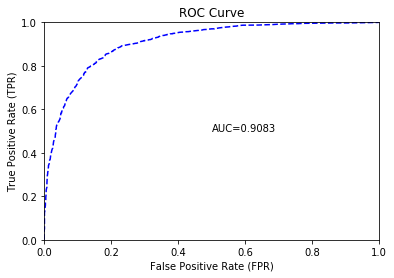


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.11710460224657997
RMSE: 0.34220549710163917
LogLoss: 0.37804244207062865
Mean Per-Class Error: 0.16554119528385436
AUC: 0.9082806336980799
AUCPR: 0.9376439687063514
Gini: 0.8165612673961598

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5255053777059383: 


,,0,1,Error,Rate
0,0,1351.0,408.0,0.2319,(408.0/1759.0)
1,1,314.0,2593.0,0.108,(314.0/2907.0)
2,Total,1665.0,3001.0,0.1547,(722.0/4666.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.525505,0.877793,233.0
1,max f2,0.221497,0.923196,342.0
2,max f0point5,0.688452,0.882736,176.0
3,max accuracy,0.525505,0.845264,233.0
4,max precision,0.981898,1.000000,0.0
5,max recall,0.071519,1.000000,399.0
6,max specificity,0.981898,1.000000,0.0
7,max absolute_mcc,0.525505,0.667701,233.0
8,max min_per_class_accuracy,0.626736,0.832291,196.0
9,max mean_per_class_accuracy,0.593226,0.834459,208.0



Gains/Lift Table: Avg response rate: 62,30 %, avg score: 62,69 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010287,0.969592,1.605091,1.605091,1.000000,0.971163,1.000000,0.971163,0.016512,0.016512,60.509116,60.509116
1,,2,0.020146,0.968202,1.605091,1.605091,1.000000,0.968908,1.000000,0.970059,0.015824,0.032336,60.509116,60.509116
2,,3,0.030004,0.965615,1.570198,1.593626,0.978261,0.966926,0.992857,0.969030,0.015480,0.047816,57.019787,59.362622
3,,4,0.041792,0.963703,1.575908,1.588629,0.981818,0.964550,0.989744,0.967766,0.018576,0.066391,57.590768,58.862869
4,,5,0.050150,0.961532,1.605091,1.591372,1.000000,0.962972,0.991453,0.966967,0.013416,0.079807,60.509116,59.137243
5,,6,0.100300,0.947946,1.570794,1.581083,0.978632,0.954343,0.985043,0.960655,0.078775,0.158583,57.079434,58.108339
6,,7,0.151522,0.934454,1.551364,1.571037,0.966527,0.939829,0.978784,0.953615,0.079463,0.238046,55.136426,57.103689
7,,8,0.203815,0.919108,1.565622,1.569648,0.975410,0.926571,0.977918,0.946676,0.081871,0.319917,56.562170,56.964751
8,,9,0.300686,0.882767,1.487905,1.543313,0.926991,0.899751,0.961511,0.931558,0.144135,0.464052,48.790530,54.331288
9,,10,0.400986,0.818056,1.440466,1.517588,0.897436,0.854158,0.945484,0.912198,0.144479,0.608531,44.046642,51.758753


In [189]:
# Così si valuta sul test set
perf = gbm.model_performance(test_data = test)
perf.plot(type = "roc")
perf

# Only categorical variable

In questa sezione prendo solo come predittori solo le variabili categoriche

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# leggo i dati e faccio la codifica di conc1_mean subito all'interno del dataset
# h2o non richiede la variabile target separata dal dataset ma richiede il nome della variabile target e dei predittori,
# le altre variabili vengono ignorate.

db = pd.read_csv('dataset/db_modelli.csv').drop(columns = 'Unnamed: 0')
# codifica
db['conc1_mean'] = np.where(db['conc1_mean'].values > 1, 1, 0)

# nome target
target = 'conc1_mean'
# nome esplicative --> solo variabili categoriche
predictors = db.columns[db.dtypes == 'object'].to_list()
predictors.remove('test_cas')

# trasformazione
db_h = h2o.H2OFrame(db)
# occorre
for i in predictors:
    db_h[i] = db_h[i].asfactor()

db_h['conc1_mean'] = db_h['conc1_mean'].asfactor()
db_h.shape

Parse progress: |█████████████████████████████████████████████████████████| 100%


(23332, 20)

Bisogna capire con quale encoding il modello è stato costruito

In [14]:
# Splitting in train e test
train, test = db_h.split_frame(ratios = [0.7])

from h2o.estimators import H2OGradientBoostingEstimator

gbm = H2OGradientBoostingEstimator(nfolds = 3, seed =123, categorical_encoding = 'one_hot_explicit')
gbm.train(training_frame = train, x = predictors, y = target)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [16]:
predictors

['species',
 'conc1_type',
 'exposure_type',
 'class',
 'tax_order',
 'family',
 'genus']

In [15]:
# Valori ottenuti da cross-validation

print(gbm.accuracy(xval = True))
print(gbm.auc(xval = True))
print(gbm.confusion_matrix(xval = True))
gbm

[[0.5543950530881102, 0.6716225348651471]]
0.6644781038202053

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4729591226193014: 


,,0,1,Error,Rate
0,0,698.0,5252.0,0.8827,(5252.0/5950.0)
1,1,201.0,10126.0,0.0195,(201.0/10327.0)
2,Total,899.0,15378.0,0.335,(5453.0/16277.0)



Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1593677686783_201


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,12558.0,5.0,5.0,5.0,7.0,25.0,15.28




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.20926225255465805
RMSE: 0.45745191283309555
LogLoss: 0.6068207171627983
Mean Per-Class Error: 0.3672816546004478
AUC: 0.6867864039195615
AUCPR: 0.7782455368245506
Gini: 0.37357280783912294

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49456244631356794: 


,,0,1,Error,Rate
0,0,861.0,5089.0,0.8553,(5089.0/5950.0)
1,1,204.0,10123.0,0.0198,(204.0/10327.0)
2,Total,1065.0,15212.0,0.3252,(5293.0/16277.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.494562,0.792748,284.0
1,max f2,0.443508,0.899896,316.0
2,max f0point5,0.596143,0.729340,198.0
3,max accuracy,0.591650,0.681084,206.0
4,max precision,0.864157,0.961240,0.0
5,max recall,0.135331,1.000000,398.0
6,max specificity,0.864157,0.999160,0.0
7,max absolute_mcc,0.591650,0.264238,206.0
8,max min_per_class_accuracy,0.626064,0.629748,165.0
9,max mean_per_class_accuracy,0.642973,0.632718,142.0



Gains/Lift Table: Avg response rate: 63,45 %, avg score: 63,44 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010997,0.849301,1.514522,1.514522,0.960894,0.860007,0.960894,0.860007,0.016655,0.016655,51.452206,51.452206
1,,2,0.021871,0.803962,1.415872,1.465474,0.898305,0.808847,0.929775,0.834571,0.015397,0.032052,41.587217,46.547422
2,,3,0.040302,0.788467,1.360751,1.417583,0.863333,0.791636,0.899390,0.814936,0.025080,0.057132,36.075111,41.758255
3,,4,0.060085,0.788227,1.341204,1.392435,0.850932,0.788227,0.883436,0.806143,0.026532,0.083664,34.120412,39.243546
4,,5,0.123241,0.757273,1.274113,1.331800,0.808366,0.758843,0.844965,0.781904,0.080469,0.164133,27.411344,33.179985
5,,6,0.165571,0.745160,1.198705,1.297773,0.760522,0.747389,0.823377,0.773080,0.050741,0.214874,19.870482,29.777295
6,,7,0.204767,0.719950,1.292056,1.296679,0.819749,0.728372,0.822682,0.764522,0.050644,0.265518,29.205558,29.667854
7,,8,0.310438,0.689233,1.187618,1.259555,0.753488,0.700098,0.799129,0.742592,0.125496,0.391014,18.761792,25.955519
8,,9,0.400688,0.658712,1.087969,1.220907,0.690265,0.674549,0.774609,0.727266,0.098189,0.489203,8.796856,22.090742
9,,10,0.501321,0.641656,1.081565,1.192936,0.686203,0.647217,0.756863,0.711198,0.108841,0.598044,8.156494,19.293647




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.21307451890311013
RMSE: 0.4615999554843026
LogLoss: 0.6151933779346844
Mean Per-Class Error: 0.3858335781296154
AUC: 0.6644781038202053
AUCPR: 0.7610225769976133
Gini: 0.32895620764041067

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4729591226193014: 


,,0,1,Error,Rate
0,0,698.0,5252.0,0.8827,(5252.0/5950.0)
1,1,201.0,10126.0,0.0195,(201.0/10327.0)
2,Total,899.0,15378.0,0.335,(5453.0/16277.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.472959,0.787862,289.0
1,max f2,0.233468,0.897911,379.0
2,max f0point5,0.576829,0.720527,213.0
3,max accuracy,0.554395,0.671623,231.0
4,max precision,0.853935,0.957447,2.0
5,max recall,0.119746,1.000000,397.0
6,max specificity,0.875260,0.999664,0.0
7,max absolute_mcc,0.576829,0.233530,213.0
8,max min_per_class_accuracy,0.635362,0.589135,159.0
9,max mean_per_class_accuracy,0.634411,0.614166,160.0



Gains/Lift Table: Avg response rate: 63,45 %, avg score: 63,53 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010321,0.843840,1.482341,1.482341,0.940476,0.860190,0.940476,0.860190,0.015300,0.015300,48.234056,48.234056
1,,2,0.022977,0.801723,1.323668,1.394943,0.839806,0.820507,0.885027,0.838332,0.016752,0.032052,32.366800,39.494337
2,,3,0.031947,0.791456,1.381839,1.391264,0.876712,0.792293,0.882692,0.825406,0.012395,0.044447,38.183854,39.126394
3,,4,0.040732,0.784924,1.355718,1.383597,0.860140,0.786237,0.877828,0.816958,0.011911,0.056357,35.571768,38.359710
4,,5,0.050501,0.778773,1.328336,1.372908,0.842767,0.783699,0.871046,0.810524,0.012976,0.069333,32.833575,37.290786
5,,6,0.101001,0.764718,1.246355,1.309631,0.790754,0.771365,0.830900,0.790945,0.062942,0.132275,24.635490,30.963138
6,,7,0.151932,0.737193,1.218719,1.279156,0.773221,0.748394,0.811565,0.776681,0.062070,0.194345,21.871929,27.915579
7,,8,0.201511,0.720388,1.234365,1.268136,0.783147,0.728949,0.804573,0.764937,0.061199,0.255544,23.436537,26.813571
8,,9,0.302451,0.690491,1.145426,1.227183,0.726719,0.705408,0.778590,0.745070,0.115619,0.371163,14.542577,22.718255
9,,10,0.400074,0.655604,1.104006,1.197126,0.700441,0.675676,0.759521,0.728137,0.107776,0.478939,10.400605,19.712612




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.6664524,0.0014482195,0.6681247,0.6656215,0.665611
1,auc,0.66506773,0.0022372054,0.6625227,0.6659568,0.6667237
2,aucpr,0.76241076,0.00620115,0.7672901,0.76450956,0.75543255
3,err,0.3335476,0.0014482195,0.33187535,0.33437845,0.33438897
4,err_count,1809.6666,13.316656,1821.0,1813.0,1795.0
5,f0point5,0.7057994,0.0029385518,0.7089921,0.70519817,0.70320797
6,f1,0.7883591,0.0022407682,0.79090595,0.78748095,0.7866904
7,f2,0.8927955,0.0013640303,0.8942203,0.89150167,0.8926645
8,lift_top_group,1.4901208,0.061716434,1.4287002,1.5521289,1.4895332
9,logloss,0.61520797,0.0023144821,0.6125403,0.6166816,0.6164021



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-07-02 11:45:01,1 min 8.602 sec,0.0,0.481583,0.656543,0.500000,0.634454,1.000000,0.365546
1,,2020-07-02 11:45:02,1 min 9.149 sec,1.0,0.479144,0.651503,0.615238,0.738875,1.394076,0.358358
2,,2020-07-02 11:45:02,1 min 9.446 sec,2.0,0.476807,0.646717,0.632486,0.746270,1.394076,0.351047
3,,2020-07-02 11:45:02,1 min 9.759 sec,3.0,0.475124,0.643308,0.633701,0.745062,1.362640,0.351047
4,,2020-07-02 11:45:02,1 min 10.056 sec,4.0,0.473405,0.639789,0.640094,0.751457,1.472149,0.349327
5,,2020-07-02 11:45:03,1 min 10.399 sec,5.0,0.472246,0.637429,0.639367,0.748566,1.389999,0.347853
6,,2020-07-02 11:45:03,1 min 10.727 sec,6.0,0.471276,0.635383,0.640631,0.751385,1.463577,0.348590
7,,2020-07-02 11:45:03,1 min 11.009 sec,7.0,0.470132,0.633028,0.644016,0.753836,1.463577,0.348467
8,,2020-07-02 11:45:04,1 min 11.368 sec,8.0,0.469433,0.631614,0.646743,0.754292,1.463577,0.346686
9,,2020-07-02 11:45:04,1 min 11.889 sec,9.0,0.468868,0.630444,0.647640,0.755309,1.458216,0.346133



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,exposure_type.F,227.541611,1.000000,0.116474
1,conc1_type.T,157.125259,0.690534,0.080429
2,species.promelas,139.056244,0.611124,0.071180
3,family.Cyprinidae,127.580948,0.560693,0.065306
4,species.xanthurus,108.862755,0.478430,0.055725
5,tax_order.Beloniformes,95.921959,0.421558,0.049100
6,family.Percidae,57.114971,0.251009,0.029236
7,conc1_type.A,52.223701,0.229513,0.026732
8,exposure_type.R,51.850464,0.227872,0.026541
9,species.cephalus,48.249321,0.212046,0.024698



See the whole table with table.as_data_frame()


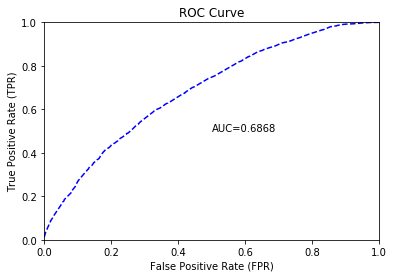

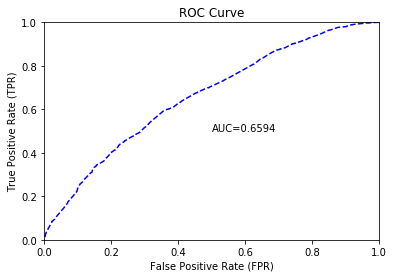

In [17]:
perf = gbm.model_performance()
perf.plot(type = 'roc')

perf = gbm.model_performance(test_data = test)
perf.plot(type = 'roc')

L'utilizzo delle sole variabili categoriche non è molto consigliato... i risultati fanno un pochino schifo

In [18]:
# Sul test set

print(perf.accuracy())
print(perf.auc())
print(perf.confusion_matrix())

[[0.5582814571384083, 0.6630758327427356]]
0.6594444880758746

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4953663238954007: 


,,0,1,Error,Rate
0,0,328.0,2288.0,0.8746,(2288.0/2616.0)
1,1,107.0,4332.0,0.0241,(107.0/4439.0)
2,Total,435.0,6620.0,0.3395,(2395.0/7055.0)


## Spiegazione encoding

Nei modelli è possibile specificare un parametro denominato **categorical_encoding**. Di default è settato *AUTO*, solo nel Gradient Boosting, ossia mantiene 1 colonna per variabili categorica. Per fare **one-hot encoding** occorre settare questo parametro con *one_hot_explicit*.

In generale, trasformare le variabili categoriche in fattori permette di assegnare dei livelli alle modalità che la variabile può assumere. 

> Esempio: in questo dataset la variabile *class* indica la classe filogenetica dell'animale ed assume 3 modalità: *Actinopterygii*, *Chondrichthyes*, *Cephalaspidomorphi*. Rispettivamente sarà assegnato il livello 0 alla prima classe, livello 1 alla seconda e livello 2 alla terza.

In alternativa, il settaggio del parametro **categorical_encoding** può essere cambiato in:
- *label_encoder* che trasforma il livello in un numero: livello 0 -> 0, livello 1 -> 1, e così via.
- *binary* che mantiene un massimo di 32 colonne per variabile
- *eigen* k columns per categorical feature, keeping projections of one-hot-encoded matrix onto k-dim eigen space only
- *sort_by_response* che ordina in base alla frequenza di risposta. La modalità meno frequente avrà il livello 0, la seconda meno pfrequente avrà il livello 1 e così via.

# All variables

In [19]:
import pandas as pd
import numpy as np
from h2o.estimators import H2OGradientBoostingEstimator
# levare test_cas sui modelli
db = pd.read_csv('dataset/db_modelli.csv').drop(columns = 'Unnamed: 0')
# codifica
db['conc1_mean'] = np.where(db['conc1_mean'].values > 1, 1, 0)

target = 'conc1_mean'
predictors = db.columns.to_list()
predictors.remove(target)
predictors.remove('test_cas')

# categorical to factors
db_h = h2o.H2OFrame(db)
# occorre
for i in db.columns:
    if db[i].dtypes == 'object':
        db_h[i] = db_h[i].asfactor()

db_h['conc1_mean'] = db_h['conc1_mean'].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [20]:
# splitting
train, test = db_h.split_frame(ratios = [0.7])

gbm = H2OGradientBoostingEstimator(nfolds = 3, seed =123, categorical_encoding = 'one_hot_explicit')
gbm.train(training_frame = train, x = predictors, y = target)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [21]:
gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1593677686783_278


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,19949.0,5.0,5.0,5.0,15.0,32.0,27.04




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.1055313100385044
RMSE: 0.32485582962062476
LogLoss: 0.35091503283854003
Mean Per-Class Error: 0.15133648369065944
AUC: 0.9269759024062056
AUCPR: 0.9521502354971976
Gini: 0.8539518048124113

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5109612748145329: 


,,0,1,Error,Rate
0,0,4538.0,1476.0,0.2454,(1476.0/6014.0)
1,1,763.0,9643.0,0.0733,(763.0/10406.0)
2,Total,5301.0,11119.0,0.1364,(2239.0/16420.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.510961,0.895981,225.0
1,max f2,0.305915,0.935196,299.0
2,max f0point5,0.671910,0.896024,162.0
3,max accuracy,0.510961,0.863642,225.0
4,max precision,0.965934,1.000000,0.0
5,max recall,0.069723,1.000000,394.0
6,max specificity,0.965934,1.000000,0.0
7,max absolute_mcc,0.510961,0.701969,225.0
8,max min_per_class_accuracy,0.642999,0.848068,174.0
9,max mean_per_class_accuracy,0.646543,0.848664,173.0



Gains/Lift Table: Avg response rate: 63,37 %, avg score: 63,36 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010110,0.961786,1.577936,1.577936,1.000000,0.963607,1.000000,0.963607,0.015952,0.015952,57.793581,57.793581
1,,2,0.020037,0.958357,1.548894,1.563547,0.981595,0.959926,0.990881,0.961783,0.015376,0.031328,54.889404,56.354733
2,,3,0.030024,0.956344,1.568314,1.565133,0.993902,0.957160,0.991886,0.960245,0.015664,0.046992,56.831425,56.513308
3,,4,0.040073,0.954030,1.577936,1.568343,1.000000,0.955192,0.993921,0.958978,0.015856,0.062848,57.793581,56.834349
4,,5,0.050000,0.951752,1.568255,1.568326,0.993865,0.952951,0.993910,0.957782,0.015568,0.078416,56.825522,56.832597
5,,6,0.100244,0.938461,1.558809,1.563556,0.987879,0.944879,0.990887,0.951315,0.078320,0.156736,55.880931,56.355608
6,,7,0.150183,0.922433,1.552920,1.560019,0.984146,0.930778,0.988646,0.944486,0.077551,0.234288,55.291975,56.001926
7,,8,0.200122,0.906598,1.533677,1.553446,0.971951,0.913971,0.984480,0.936871,0.076590,0.310878,53.367663,55.344563
8,,9,0.300000,0.873792,1.527904,1.544942,0.968293,0.891605,0.979091,0.921801,0.152604,0.463483,52.790370,54.494202
9,,10,0.400000,0.824948,1.436671,1.517874,0.910475,0.851650,0.961937,0.904263,0.143667,0.607150,43.667115,51.787430




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.11552420474581801
RMSE: 0.3398885181141281
LogLoss: 0.3758281729864402
Mean Per-Class Error: 0.16622801329539172
AUC: 0.9105564337322722
AUCPR: 0.9407516715368073
Gini: 0.8211128674645445

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49810700233964944: 


,,0,1,Error,Rate
0,0,4338.0,1676.0,0.2787,(1676.0/6014.0)
1,1,902.0,9504.0,0.0867,(902.0/10406.0)
2,Total,5240.0,11180.0,0.157,(2578.0/16420.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.498107,0.880571,228.0
1,max f2,0.280383,0.927235,308.0
2,max f0point5,0.680319,0.882995,158.0
3,max accuracy,0.515256,0.843544,222.0
4,max precision,0.972896,1.000000,0.0
5,max recall,0.066748,1.000000,394.0
6,max specificity,0.972896,1.000000,0.0
7,max absolute_mcc,0.576385,0.662173,197.0
8,max min_per_class_accuracy,0.636610,0.832059,173.0
9,max mean_per_class_accuracy,0.598722,0.833772,188.0



Gains/Lift Table: Avg response rate: 63,37 %, avg score: 63,28 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010049,0.960617,1.558809,1.558809,0.987879,0.963594,0.987879,0.963594,0.015664,0.015664,55.880931,55.880931
1,,2,0.020037,0.957316,1.558693,1.558751,0.987805,0.958878,0.987842,0.961244,0.015568,0.031232,55.869269,55.875118
2,,3,0.030024,0.954786,1.558693,1.558732,0.987805,0.955928,0.987830,0.959475,0.015568,0.046800,55.869269,55.873172
3,,4,0.040012,0.952426,1.577936,1.563525,1.000000,0.953600,0.990868,0.958009,0.015760,0.062560,57.793581,56.352543
4,,5,0.050000,0.950329,1.558693,1.562560,0.987805,0.951397,0.990256,0.956688,0.015568,0.078128,55.869269,56.256006
5,,6,0.100000,0.936720,1.543340,1.552950,0.978076,0.943885,0.984166,0.950286,0.077167,0.155295,54.334038,55.295022
6,,7,0.150000,0.921333,1.552950,1.552950,0.984166,0.929428,0.984166,0.943334,0.077648,0.232943,55.295022,55.295022
7,,8,0.200061,0.906468,1.526106,1.546233,0.967153,0.913994,0.979909,0.935992,0.076398,0.309341,52.610580,54.623299
8,,9,0.300000,0.873911,1.486587,1.526363,0.942108,0.890742,0.967316,0.920918,0.148568,0.457909,48.658669,52.636300
9,,10,0.400000,0.822351,1.419373,1.499616,0.899513,0.849413,0.950365,0.903042,0.141937,0.599846,41.937344,49.961561




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.84356314,0.009581615,0.835411,0.8541172,0.84116125
1,auc,0.9107444,0.006273058,0.9050146,0.91744703,0.9097716
2,aucpr,0.941001,0.0045847166,0.9364637,0.9456317,0.94090754
3,err,0.15643685,0.009581615,0.16458897,0.14588279,0.15883876
4,err_count,856.3333,56.0476,911.0,799.0,859.0
5,f0point5,0.85962075,0.013215275,0.84589744,0.8722614,0.8607034
6,f1,0.88202053,0.005867999,0.8786789,0.8887961,0.8785866
7,f2,0.9057674,0.008439317,0.9141036,0.9059698,0.89722866
8,lift_top_group,1.5779766,0.0049470463,1.576025,1.5743029,1.5836017
9,logloss,0.37581283,0.0074754665,0.3822523,0.3676149,0.37757125



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-07-02 11:49:28,1 min 2.345 sec,0.0,0.481782,0.656936,0.500000,0.633739,1.000000,0.366261
1,,2020-07-02 11:49:29,1 min 2.845 sec,1.0,0.464006,0.621041,0.853082,0.901616,1.548869,0.213764
2,,2020-07-02 11:49:29,1 min 3.174 sec,2.0,0.448799,0.591599,0.863164,0.906233,1.546104,0.194153
3,,2020-07-02 11:49:30,1 min 3.485 sec,3.0,0.436019,0.567368,0.868178,0.908782,1.546104,0.187272
4,,2020-07-02 11:49:30,1 min 3.798 sec,4.0,0.424911,0.546480,0.871224,0.911401,1.544414,0.189342
5,,2020-07-02 11:49:30,1 min 4.095 sec,5.0,0.415174,0.528420,0.875389,0.914110,1.544716,0.183800
6,,2020-07-02 11:49:30,1 min 4.407 sec,6.0,0.406375,0.512167,0.877927,0.915344,1.548835,0.180451
7,,2020-07-02 11:49:31,1 min 4.720 sec,7.0,0.398393,0.497344,0.884672,0.919892,1.550113,0.173873
8,,2020-07-02 11:49:31,1 min 5.032 sec,8.0,0.391723,0.484804,0.885801,0.920916,1.559729,0.171011
9,,2020-07-02 11:49:32,1 min 5.907 sec,9.0,0.386298,0.474430,0.885652,0.920391,1.559729,0.173264



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,LogP,5432.118164,1.000000,0.489874
1,Mol,1700.131348,0.312978,0.153320
2,bonds_number,824.540100,0.151790,0.074358
3,MorganDensity,672.626648,0.123824,0.060658
4,atom_number,382.592529,0.070432,0.034503
5,ring_number,280.797943,0.051692,0.025323
6,alone_atom_number,236.634171,0.043562,0.021340
7,doubleBond,172.232483,0.031706,0.015532
8,conc1_type.T,161.639786,0.029756,0.014577
9,tripleBond,147.719193,0.027194,0.013321



See the whole table with table.as_data_frame()


0.9100403353369187
[[0.5264056684348716, 0.8495370370370371]]


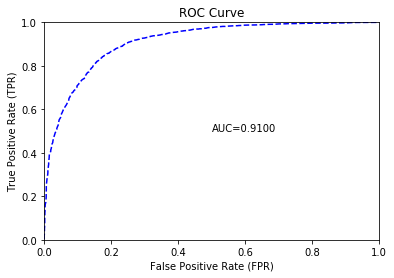

In [22]:
perf = gbm.model_performance(test_data = test)
print(perf.auc())
print(perf.accuracy())
perf.plot(type = 'roc')

Si può spingere sui parametri

# Only chemicals

In [31]:
import pandas as pd
import numpy as np
from h2o.estimators import H2OGradientBoostingEstimator
# levare test_cas sui modelli
db = pd.read_csv('dataset/db_modelli.csv').drop(columns = 'Unnamed: 0')
# codifica
db['conc1_mean'] = np.where(db['conc1_mean'].values > 1, 1, 0)

target = 'conc1_mean'
predictors = db.columns.to_list()
predictors.remove(target)
predictors.remove('test_cas')
predictors.remove('species')
predictors.remove('class')
predictors.remove('tax_order')
predictors.remove('family')
predictors.remove('genus')


# categorical to factors
db_h = h2o.H2OFrame(db)
# occorre
for i in db.columns:
    if db[i].dtypes == 'object':
        db_h[i] = db_h[i].asfactor()

db_h['conc1_mean'] = db_h['conc1_mean'].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [32]:
# splitting
train, test = db_h.split_frame(ratios = [0.7])

gbm = H2OGradientBoostingEstimator(nfolds = 3, seed =123, categorical_encoding = 'one_hot_explicit')
gbm.train(training_frame = train, x = predictors, y = target)
gbm

gbm Model Build progress: |███████████████████████████████████████████████| 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1593677686783_347


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,21450.0,5.0,5.0,5.0,22.0,32.0,29.46




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.10831983247254132
RMSE: 0.32911978438334777
LogLoss: 0.35606235994906077
Mean Per-Class Error: 0.1556376978565044
AUC: 0.9210275783111943
AUCPR: 0.9489302437169131
Gini: 0.8420551566223886

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5027881490816374: 


,,0,1,Error,Rate
0,0,4504.0,1518.0,0.2521,(1518.0/6022.0)
1,1,825.0,9568.0,0.0794,(825.0/10393.0)
2,Total,5329.0,11086.0,0.1427,(2343.0/16415.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.502788,0.890917,236.0
1,max f2,0.271757,0.931893,314.0
2,max f0point5,0.673955,0.891138,173.0
3,max accuracy,0.554309,0.857387,217.0
4,max precision,0.977723,1.000000,0.0
5,max recall,0.074028,1.000000,393.0
6,max specificity,0.977723,1.000000,0.0
7,max absolute_mcc,0.554309,0.690847,217.0
8,max min_per_class_accuracy,0.643331,0.840277,183.0
9,max mean_per_class_accuracy,0.587020,0.844362,204.0



Gains/Lift Table: Avg response rate: 63,31 %, avg score: 63,30 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010052,0.962322,1.579428,1.579428,1.000000,0.967336,1.000000,0.967336,0.015876,0.015876,57.942846,57.942846
1,,2,0.020286,0.959461,1.570027,1.574685,0.994048,0.960584,0.996997,0.963930,0.016069,0.031945,57.002710,57.468543
2,,3,0.030216,0.956766,1.579428,1.576244,1.000000,0.958042,0.997984,0.961995,0.015684,0.047628,57.942846,57.624413
3,,4,0.040024,0.955951,1.569618,1.574620,0.993789,0.956398,0.996956,0.960623,0.015395,0.063023,56.961835,57.462046
4,,5,0.050259,0.954129,1.570027,1.573685,0.994048,0.955029,0.996364,0.959484,0.016069,0.079092,57.002710,57.368509
5,,6,0.100213,0.943071,1.554389,1.564066,0.984146,0.949157,0.990274,0.954336,0.077648,0.156740,55.438874,56.406624
6,,7,0.152543,0.930368,1.555526,1.561136,0.984866,0.936294,0.988419,0.948147,0.081401,0.238141,55.552559,56.113636
7,,8,0.200000,0.915766,1.551043,1.558741,0.982028,0.923334,0.986902,0.942259,0.073607,0.311748,55.104335,55.874146
8,,9,0.300030,0.887003,1.502477,1.539983,0.951279,0.901921,0.975025,0.928811,0.150293,0.462042,50.247701,53.998284
9,,10,0.400000,0.829122,1.426394,1.511594,0.903108,0.859369,0.957051,0.911455,0.142596,0.604638,42.639426,51.159434




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.11614687907983555
RMSE: 0.3408032850191376
LogLoss: 0.3761476090965038
Mean Per-Class Error: 0.1690998587781809
AUC: 0.9074901776970122
AUCPR: 0.9392862942570737
Gini: 0.8149803553940245

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4928574862874899: 


,,0,1,Error,Rate
0,0,4333.0,1689.0,0.2805,(1689.0/6022.0)
1,1,885.0,9508.0,0.0852,(885.0/10393.0)
2,Total,5218.0,11197.0,0.1568,(2574.0/16415.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.492857,0.880778,232.0
1,max f2,0.238968,0.924725,321.0
2,max f0point5,0.706995,0.881075,151.0
3,max accuracy,0.527775,0.843862,219.0
4,max precision,0.979220,1.000000,0.0
5,max recall,0.059418,1.000000,396.0
6,max specificity,0.979220,1.000000,0.0
7,max absolute_mcc,0.563310,0.660439,206.0
8,max min_per_class_accuracy,0.647573,0.827300,176.0
9,max mean_per_class_accuracy,0.599152,0.830900,194.0



Gains/Lift Table: Avg response rate: 63,31 %, avg score: 63,22 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010113,0.965210,1.569914,1.569914,0.993976,0.968621,0.993976,0.968621,0.015876,0.015876,56.991383,56.991383
1,,2,0.020043,0.961771,1.569739,1.569827,0.993865,0.963415,0.993921,0.966042,0.015587,0.031463,56.973872,56.982707
2,,3,0.030034,0.959540,1.560167,1.566614,0.987805,0.960627,0.991886,0.964240,0.015587,0.047051,56.016714,56.661363
3,,4,0.040024,0.958048,1.579428,1.569812,1.000000,0.958774,0.993912,0.962876,0.015780,0.062831,57.942846,56.981246
4,,5,0.050015,0.956343,1.569798,1.569810,0.993902,0.957245,0.993910,0.961751,0.015684,0.078514,56.979780,56.980953
5,,6,0.100030,0.945039,1.556343,1.563076,0.985384,0.951294,0.989647,0.956523,0.077841,0.156355,55.634303,56.307628
6,,7,0.150046,0.930430,1.540953,1.555702,0.975639,0.937795,0.984978,0.950280,0.077071,0.233426,54.095274,55.570177
7,,8,0.200061,0.914540,1.498629,1.541434,0.948843,0.922153,0.975944,0.943248,0.074954,0.308381,49.862944,54.143368
8,,9,0.300091,0.880709,1.495744,1.526204,0.947016,0.897628,0.966301,0.928041,0.149620,0.458001,49.574376,52.620371
9,,10,0.400000,0.828118,1.407040,1.496440,0.890854,0.857801,0.947457,0.910497,0.140575,0.598576,40.703962,49.643991




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.8430311,0.0043309843,0.83821404,0.84660333,0.84427595
1,auc,0.9079215,0.0064703454,0.90045065,0.9117324,0.91158134
2,aucpr,0.93978876,0.0060669947,0.9328145,0.94270355,0.9438483
3,err,0.15696889,0.0043309843,0.16178598,0.15339664,0.15572406
4,err_count,859.0,31.192947,895.0,840.0,842.0
5,f0point5,0.8581113,0.004183735,0.8547561,0.8567788,0.862799
6,f1,0.88167244,0.0052904314,0.8763641,0.88694483,0.8817083
7,f2,0.90662354,0.011052821,0.899093,0.91931254,0.9014651
8,lift_top_group,1.579458,0.015022557,1.5956159,1.5659137,1.5768446
9,logloss,0.3760865,0.011823979,0.3893386,0.36661568,0.37230524



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-07-02 11:58:07,8.768 sec,0.0,0.481948,0.657263,0.500000,0.633140,1.000000,0.366860
1,,2020-07-02 11:58:07,8.877 sec,1.0,0.463940,0.620946,0.851259,0.887847,1.506327,0.207737
2,,2020-07-02 11:58:07,8.955 sec,2.0,0.449089,0.592186,0.857512,0.894106,1.506327,0.193055
3,,2020-07-02 11:58:07,9.018 sec,3.0,0.436373,0.568035,0.867216,0.906182,1.506327,0.187511
4,,2020-07-02 11:58:07,9.080 sec,4.0,0.425912,0.548346,0.867700,0.907016,1.506532,0.190679
5,,2020-07-02 11:58:07,9.158 sec,5.0,0.416831,0.531163,0.871559,0.911841,1.533351,0.186902
6,,2020-07-02 11:58:07,9.221 sec,6.0,0.408742,0.515865,0.873360,0.914217,1.562581,0.185257
7,,2020-07-02 11:58:08,9.299 sec,7.0,0.400684,0.500832,0.879408,0.917772,1.560792,0.180688
8,,2020-07-02 11:58:08,9.393 sec,8.0,0.394051,0.488298,0.880958,0.918187,1.543645,0.177581
9,,2020-07-02 11:58:08,9.471 sec,9.0,0.388180,0.477158,0.882594,0.918789,1.543105,0.176119



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,LogP,5401.443359,1.000000,0.497930
1,Mol,1763.961426,0.326572,0.162610
2,bonds_number,802.943604,0.148654,0.074019
3,MorganDensity,743.244690,0.137601,0.068516
4,atom_number,460.221405,0.085203,0.042425
5,ring_number,312.237000,0.057806,0.028783
6,doubleBond,292.783447,0.054205,0.026990
7,alone_atom_number,231.616028,0.042880,0.021351
8,exposure_type.F,167.074585,0.030931,0.015402
9,conc1_type.T,166.872253,0.030894,0.015383



See the whole table with table.as_data_frame()


[[0.5653158333487921, 0.8489229434726038]]
0.9137354974133729


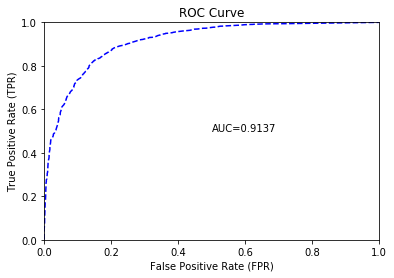

In [33]:
perf = gbm.model_performance(test_data = test)
print(perf.accuracy())
print(perf.auc())
perf.plot(type = 'roc')

# Random Forest

Parametri interessanti da provare:
- binomial_double_trees: (Binary classification only) Build twice as many trees (one per class). Enabling this option can lead to higher accuracy, while disabling can result in faster model building. This option is disabled by default. TRUE or FALSE

- categorical_encoding: come prima

## All Variable

In [3]:
import pandas as pd
import numpy as np
from h2o.estimators import H2OGradientBoostingEstimator
# levare test_cas sui modelli
db = pd.read_csv('dataset/db_modelli.csv').drop(columns = 'Unnamed: 0')
# codifica
db['conc1_mean'] = np.where(db['conc1_mean'].values > 1, 1, 0)

target = 'conc1_mean'
predictors = db.columns.to_list()
predictors.remove(target)
predictors.remove('test_cas')

# categorical to factors
db_h = h2o.H2OFrame(db)
# occorre
for i in db.columns:
    if db[i].dtypes == 'object':
        db_h[i] = db_h[i].asfactor()

db_h['conc1_mean'] = db_h['conc1_mean'].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [12]:
from h2o.estimators import H2ORandomForestEstimator
train, test = db_h.split_frame(ratios = [0.7])


drf_all = H2ORandomForestEstimator(nfolds = 3, seed = 123, categorical_encoding = 'eigen',
                                  binomial_double_trees = True)
drf_all.train(x = predictors, y  =target, training_frame = train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [13]:
drf_all

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1593701863900_286


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,100.0,2038640.0,20.0,20.0,20.0,1453.0,1804.0,1619.91




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.07904513756587823
RMSE: 0.2811496711110974
LogLoss: 0.3166334995507751
Mean Per-Class Error: 0.11121746623906459
AUC: 0.9518536741912718
AUCPR: 0.9669440817367044
Gini: 0.9037073483825435

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49434885244616505: 


,,0,1,Error,Rate
0,0,5014.0,1005.0,0.167,(1005.0/6019.0)
1,1,720.0,9576.0,0.0699,(720.0/10296.0)
2,Total,5734.0,10581.0,0.1057,(1725.0/16315.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.494349,0.917373,213.0
1,max f2,0.228264,0.944849,297.0
2,max f0point5,0.686021,0.926011,151.0
3,max accuracy,0.494349,0.894269,213.0
4,max precision,0.999003,0.991408,2.0
5,max recall,0.000037,1.000000,399.0
6,max specificity,0.999987,0.996345,0.0
7,max absolute_mcc,0.536190,0.772125,199.0
8,max min_per_class_accuracy,0.626012,0.888021,170.0
9,max mean_per_class_accuracy,0.670597,0.888783,156.0



Gains/Lift Table: Avg response rate: 63,11 %, avg score: 62,79 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.133681,1.000000,1.568612,1.568612,0.989913,1.000000,0.989913,1.000000,0.209693,0.209693,56.861196,56.861196
1,,2,0.150046,0.999315,1.584596,1.570355,1.000000,0.999552,0.991013,0.999951,0.025932,0.235625,58.459596,57.035531
2,,3,0.200000,0.995672,1.563209,1.568570,0.986503,0.997670,0.989887,0.999381,0.078089,0.313714,56.320877,56.857032
3,,4,0.300031,0.967889,1.535077,1.557404,0.968750,0.985310,0.982840,0.994690,0.153555,0.467269,53.507734,55.740371
4,,5,0.400000,0.919102,1.507844,1.545017,0.951563,0.944785,0.975023,0.982218,0.150738,0.618007,50.784361,54.501748
5,,6,0.500031,0.823529,1.447692,1.525548,0.913603,0.875492,0.962736,0.960867,0.144814,0.762821,44.769153,52.554752
6,,7,0.600000,0.630671,1.236782,1.477435,0.780503,0.737808,0.932373,0.923702,0.123640,0.886461,23.678152,47.743460
7,,8,0.699969,0.331759,0.750036,1.373548,0.473329,0.485444,0.866813,0.861110,0.074981,0.961441,-24.996439,37.354776
8,,9,0.800000,0.096564,0.282547,1.237131,0.178309,0.203040,0.780723,0.778826,0.028263,0.989705,-71.745256,23.713092
9,,10,0.899969,0.013409,0.076752,1.108235,0.048437,0.044100,0.699380,0.697212,0.007673,0.997378,-92.324765,10.823510




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.08391881758575237
RMSE: 0.2896874480983813
LogLoss: 0.3016505739997778
Mean Per-Class Error: 0.1165584026005193
AUC: 0.9463131464813638
AUCPR: 0.9635695745242379
Gini: 0.8926262929627276

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4677080472055485: 


,,0,1,Error,Rate
0,0,4876.0,1143.0,0.1899,(1143.0/6019.0)
1,1,695.0,9601.0,0.0675,(695.0/10296.0)
2,Total,5571.0,10744.0,0.1127,(1838.0/16315.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.467708,0.912643,227.0
1,max f2,0.163646,0.940869,322.0
2,max f0point5,0.671687,0.919985,164.0
3,max accuracy,0.546372,0.888630,205.0
4,max precision,0.999977,0.994755,0.0
5,max recall,0.000173,1.000000,399.0
6,max specificity,0.999977,0.999003,0.0
7,max absolute_mcc,0.567178,0.761714,198.0
8,max min_per_class_accuracy,0.628711,0.882539,179.0
9,max mean_per_class_accuracy,0.634098,0.883442,177.0



Gains/Lift Table: Avg response rate: 63,11 %, avg score: 62,72 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.063132,1.000000,1.576904,1.576904,0.995146,1.000000,0.995146,1.000000,0.099553,0.099553,57.690375,57.690375
1,,2,0.100031,0.998948,1.574067,1.575857,0.993355,0.999468,0.994485,0.999804,0.058081,0.157634,57.406708,57.585738
2,,3,0.150046,0.994554,1.549642,1.567119,0.977941,0.997205,0.988971,0.998937,0.077506,0.235140,54.964164,56.711880
3,,4,0.200000,0.984933,1.539877,1.560315,0.971779,0.990692,0.984677,0.996878,0.076923,0.312063,53.987730,56.031469
4,,5,0.300092,0.959184,1.533167,1.551260,0.967544,0.973416,0.978962,0.989053,0.153458,0.465521,53.316694,55.125989
5,,6,0.400000,0.907127,1.505852,1.539918,0.950307,0.936226,0.971805,0.975858,0.150447,0.615967,50.585223,53.991841
6,,7,0.500031,0.812896,1.424389,1.516807,0.898897,0.863513,0.957220,0.953384,0.142483,0.758450,42.438865,51.680680
7,,8,0.600000,0.629501,1.242611,1.471121,0.784181,0.731722,0.928389,0.916451,0.124223,0.882673,24.261081,47.112147
8,,9,0.699969,0.344061,0.740320,1.366749,0.467198,0.488301,0.862522,0.855303,0.074009,0.956682,-25.967988,36.674870
9,,10,0.800000,0.115889,0.320415,1.235917,0.202206,0.220747,0.779957,0.775959,0.032051,0.988733,-67.958538,23.591686




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,accuracy,0.88923895,0.0043322262,0.8920196,0.8842473,0.8914498
1,auc,0.94635063,0.00550615,0.9448486,0.94175136,0.95245194
2,aucpr,0.9636355,0.004389827,0.9617683,0.96048796,0.9686503
3,err,0.110761076,0.0043322262,0.10798037,0.11575267,0.10855018
4,err_count,602.3333,23.629078,594.0,629.0,584.0
5,f0point5,0.9049947,0.011265847,0.91658443,0.8940834,0.90431637
6,f1,0.9137068,0.0016736205,0.91403764,0.9118924,0.9151902
7,f2,0.92275304,0.009954144,0.9115049,0.93042535,0.9263288
8,lift_top_group,1.576502,0.015929336,1.570568,1.5643913,1.5945466
9,logloss,0.30150223,0.024246287,0.3150653,0.3159319,0.2735095



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-07-02 17:32:33,12.803 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-07-02 17:32:33,12.854 sec,1.0,0.343463,2.783310,0.888841,0.907922,1.467053,0.139391
2,,2020-07-02 17:32:33,12.902 sec,2.0,0.340504,2.542494,0.892898,0.910672,1.471165,0.139279
3,,2020-07-02 17:32:33,12.956 sec,3.0,0.334010,2.266002,0.899820,0.917861,1.482815,0.135826
4,,2020-07-02 17:32:33,13.005 sec,4.0,0.326267,1.982972,0.905934,0.922637,1.489320,0.131270
5,,2020-07-02 17:32:33,13.058 sec,5.0,0.321429,1.765052,0.910408,0.926940,1.496171,0.129628
6,,2020-07-02 17:32:33,13.114 sec,6.0,0.316363,1.559594,0.916675,0.933233,1.507055,0.126001
7,,2020-07-02 17:32:33,13.169 sec,7.0,0.311837,1.386869,0.920646,0.936154,1.510971,0.123672
8,,2020-07-02 17:32:33,13.231 sec,8.0,0.308133,1.250266,0.924195,0.939459,1.516554,0.121650
9,,2020-07-02 17:32:33,13.290 sec,9.0,0.304605,1.095317,0.928188,0.943160,1.523074,0.119497



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,LogP,52671.429688,1.000000,0.239282
1,Mol,42874.476562,0.813999,0.194775
2,MorganDensity,19606.765625,0.372247,0.089072
3,bonds_number,18845.558594,0.357795,0.085614
4,tax_order.Eigen,16310.211914,0.309660,0.074096
5,atom_number,16052.531250,0.304767,0.072925
6,ring_number,10127.791992,0.192282,0.046010
7,doubleBond,8700.386719,0.165182,0.039525
8,alone_atom_number,8016.071777,0.152190,0.036416
9,obs_duration_mean,6928.047363,0.131533,0.031474


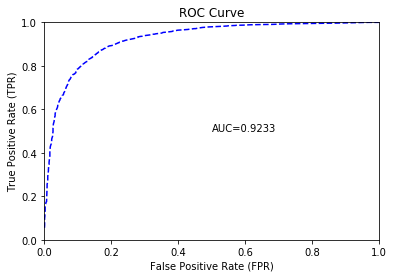


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.10291699218448615
RMSE: 0.3208067832582194
LogLoss: 0.3486160410185848
Mean Per-Class Error: 0.14895666173916933
AUC: 0.9232934039168773
AUCPR: 0.9489702055873379
Gini: 0.8465868078337546

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4985113408232632: 


,,0,1,Error,Rate
0,0,1957.0,590.0,0.2316,(590.0/2547.0)
1,1,389.0,4081.0,0.087,(389.0/4470.0)
2,Total,2346.0,4671.0,0.1395,(979.0/7017.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.498511,0.892900,224.0
1,max f2,0.180099,0.930951,321.0
2,max f0point5,0.776561,0.898954,131.0
3,max accuracy,0.508442,0.860482,221.0
4,max precision,0.998298,0.990991,3.0
5,max recall,0.001278,1.000000,398.0
6,max specificity,0.999953,0.998822,0.0
7,max absolute_mcc,0.571187,0.697745,201.0
8,max min_per_class_accuracy,0.677699,0.848449,169.0
9,max mean_per_class_accuracy,0.621529,0.851043,185.0



Gains/Lift Table: Avg response rate: 63,70 %, avg score: 64,11 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.029642,1.000000,1.554704,1.554704,0.990385,1.000000,0.990385,1.000000,0.046085,0.046085,55.470444,55.470444
1,,2,0.030070,0.999922,1.569799,1.554919,1.000000,0.999922,0.990521,0.999999,0.000671,0.046756,56.979866,55.491905
2,,3,0.040188,0.999447,1.547689,1.553099,0.985915,0.999691,0.989362,0.999921,0.015660,0.062416,54.768882,55.309867
3,,4,0.050021,0.998824,1.547048,1.551909,0.985507,0.999112,0.988604,0.999762,0.015213,0.077629,54.704795,55.190921
4,,5,0.100043,0.989152,1.551909,1.551909,0.988604,0.995529,0.988604,0.997645,0.077629,0.155257,55.190921,55.190921
5,,6,0.150064,0.979037,1.507186,1.537001,0.960114,0.981679,0.979107,0.992323,0.075391,0.230649,50.718561,53.700134
6,,7,0.200086,0.973997,1.529547,1.535138,0.974359,0.976969,0.977920,0.988485,0.076510,0.307159,52.954741,53.513786
7,,8,0.299986,0.948596,1.509336,1.526545,0.961484,0.960699,0.972447,0.979232,0.150783,0.457942,50.933566,52.654530
8,,9,0.400029,0.900713,1.475879,1.513874,0.940171,0.926485,0.964375,0.966040,0.147651,0.605593,47.587908,51.387423
9,,10,0.500071,0.823146,1.350653,1.481221,0.860399,0.867477,0.943574,0.946322,0.135123,0.740716,35.065298,48.122068


In [14]:
perf = drf_all.model_performance(test_data = test)
perf.plot(type = 'roc')
perf